In [14]:
import random
import numpy as np

import pickle
import gzip
import matplotlib.pyplot as plt


#### Load MNIST data

In [15]:
f = gzip.open('./data/mnist.pkl.gz', 'rb')
tr_d, va_d, te_d = pickle.load(f, encoding='latin1')
f.close()

def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth 
    position and zeroes elsewhere.\n
    ``8`` -> ``[[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[1.0],[0.0]]`` """
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

# training_data (50k num), validation_data (10k num), test_data (10k num)
(
    [ # lista ordinata che contiene le immagini sotto forma di np array lunghi 784 (28 x 28 pixel)
        [0.0, 0.532, ..., 0.0, 0.0],
        [0.0, 0.748, ..., 0.0, 0.0]
    ],
    [ # lista ordinata che idendifica il numero collegato all'immagine 
        3,
        5
    ]
) 

# np.reshape(x, (784, 1)) trasforma l'array lungo 784 in una matrice larga 1 e alta 784

# 50_000 numeri usati per allenare la rete
training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
training_results = [vectorized_result(y) for y in tr_d[1]]
training_data = zip(training_inputs, training_results)

# validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
# validation_data = zip(validation_inputs, va_d[1])

# 10_000 numeri usati per testare la rete
test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
test_data = zip(test_inputs, te_d[1])

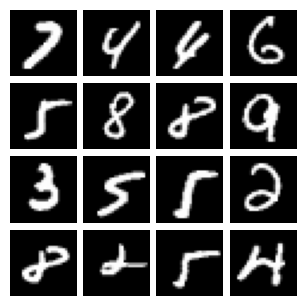

7 4 4 6 
5 8 8 9 
3 5 5 2 
8 2 5 4 



In [16]:
rand_set = random.randint(0, len(tr_d[0])-16)
image_matrices = [img.reshape((28, 28)) for img in tr_d[0][rand_set:rand_set+16]]

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(3, 3))

result_matrix = ""
for i in range(4):
    for j in range(4):
        ax = axes[i, j]
        ax.imshow(image_matrices[i*4 + j], cmap='gray')
        ax.axis('off')
        result_matrix += f"{tr_d[1][rand_set+i*4+j]} "
    result_matrix += "\n"

plt.tight_layout(pad=0.5) 
plt.show()
print(result_matrix)

### Rete Semplificata
###### 3 layers, 6 neuroni, 9 pesi e 4 biases
<img src="./img/rete_semplificata_5.svg" width="300px" />

In [17]:
class Network():

    def __init__(self, sizes):
        self.num_layers = len(sizes)
        
        self.sizes = sizes

        # self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.biases = []
        for y in sizes[1:]:
            self.biases.append(np.random.randn(y, 1))

        # per ogni layer (escluso il primo [:1])
        # appendo una matrice larga 1 e alta y
        # np.random.randn(y, 1) genera una matrice larga y e lunga x piena di numeri casuale generati secondo la ditribuzione gaussiana

        [
            [ # biases del 2° layer
                [-0.18229955], # bias del neurone c
                [ 0.55954105], # bias del neurone d
                [-0.1041088 ]  # bias del neurone e
            ],
            [ # bias del 3° layer
                [-0.29721879] # bias del neurone f
            ]
        ]



        # self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]
        self.weights = []
        for x, y in zip(sizes[:-1], sizes[1:]): # sizes[:-1] numero di layer indice i, sizes[:-1] numero di layer indice i + 1
            self.weights.append(np.random.randn(y, x))

        # print(list(zip(sizes[:-1], sizes[1:])))

        [
            [ # secondo layer di neuroni
                [-0.0696123 , -1.18933377], # pesi collegati al 1° dei 3 neuroni presenti nel 2° layer (rossi)
                [-0.04974523,  0.9851919 ], # pesi collegati al 2° dei 3 neuroni presenti nel 2° layer (verdi)
                [ 1.34270952,  0.93067125]  # pesi collegati al 3° dei 3 neuroni presenti nel 2° layer (blu)
            ], 
            [ # terzo layer di neuroni
                [-0.22923997,  1.76679014,  1.11225243] # pesi collegati all'unico neurone presente nel 3° layer (gialli)
            ]
        ]

    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""

        # print("self.biases")
        # print(self.biases)
        # print("\nself.weights")
        # print(self.weights)

        # print("\nlist(zip(self.biases, self.weights))")
        # print(list(zip(self.biases, self.weights)))

        [
            ( # layer 2
                [ # biases dei 3 neuroni del layer 2
                    [ 0.20510307],
                    [-0.91035791],
                    [-0.02419269]
                ],
        
                [ # weights dei 3 neuroni del layer 2
                    [ 1.62232805,  1.19166118], # rossi
                    [-2.64924593,  0.36606946], # verdi
                    [ 1.33485666,  0.47252189]  # blu
                ]
            ), 
       
            ( #layer 3
                [ # bias del neurone del layer 3
                    [0.11012774]
                ],
             
                [ # weights del neurone del layer 3
                    [-0.4695252 , -1.41941377,  0.77848783] # gialli
                ]
            )
        ]

        for b, w in zip(self.biases, self.weights): # per ogni layer

            # esempio del primo layer
            print("\nw")
            print(w)

            # weight
            # [
            #   [ a  b ] 
            #   [ c  d ]
            #   [ e  f ]
            #  ]

            print("\na")
            print(a)

            # input
            # [x, y]

            print("\nnp.dot(w, a)")
            print(np.dot(w, a))

            # np.dot(w, a)
            # [ a*x + b*y, c*x + d*y, e*x + f*y ]

            print("\nb")
            print(b)

            # biases
            # [ b1, b2, b3 ]

            print("\nnp.dot(w, a)+b")
            print(np.dot(w, a)+b)

            # np.dot(w, a) + b
            # [ a*x + b*y + b1,
            #   c*x + d*y + b2,
            #   e*x + f*y + b3 ]

            print("\nsigmoid(np.dot(w, a)+b)")
            print(self.sigmoid(np.dot(w, a)+b))
            
            a = self.sigmoid(np.dot(w, a)+b)


        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta, test_data=None):
        """Mini-batch Stochastic (random) Gradient Descent."""

        # se viene impostata un set di numeri su cui testare
        # salva quanti numeri sono presenti nel set
        # if test_data: n_test = len(test_data)

        n = len(training_data)

        for epoch in range(epochs):
            random.shuffle(training_data)

            
            mini_batches = [training_data[k:k+mini_batch_size] for k in range(0, n, mini_batch_size)]
            
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)

            # if test_data:
            #     # calcola quanti test vengono passati
            #     print(f"Epoch {epoch}: {self.evaluate(test_data)} / {n_test}")
            # else:
            #     print(f"Epoch {epoch} complete")

    def evaluate(self, test_data):
        """Number of test inputs for which the neural
        network outputs the correct result."""

        # np.argmax da l'indice del numero maggiore presente nella lista
        # ci darà quindi il numero riconosciuto con più confidenza
        test_results = [(np.argmax(self.feedforward(x)), y) for (x, y) in test_data]
        # False = 0, True = 1
        # ogni volta che la rete riconosce con successo un numero "aggiunge 1 al contatore" altrimenti 0
        # se 300 numeri su 1000 vengono riconosciuti ritornerà 300
        return sum(int(x == y) for (x, y) in test_results)
    
    def sigmoid(self, z):
        """Sigmoid function."""
        return 1.0/(1.0+np.exp(-z))
    
    def sigmoid_prime(self, z):
        """Derivative of the sigmoid function."""
        return self.sigmoid(z)*(1-self.sigmoid(z))

    def export(self): # da completare
        """Export previously trained data."""
        return list(zip(self.weights, self.biases))




net = Network([2, 3, 1])

net.feedforward([1, 2])

net.export()


w
[[ 1.22974158 -1.06051713]
 [-0.96149097  0.540004  ]
 [ 0.32990036 -0.03466903]]

a
[1, 2]

np.dot(w, a)
[-0.89129268  0.11851702  0.26056229]

b
[[ 0.903767  ]
 [-1.27904147]
 [ 0.86378101]]

np.dot(w, a)+b
[[ 0.01247432  1.02228402  1.16432929]
 [-2.17033415 -1.16052445 -1.01847918]
 [-0.02751168  0.98229803  1.12434329]]

sigmoid(np.dot(w, a)+b)
[[0.50311854 0.73541726 0.76211848]
 [0.1024463  0.238572   0.26532374]
 [0.49312251 0.72756396 0.75479346]]

w
[[-0.01700182 -0.71651634  0.68064861]]

a
[[0.50311854 0.73541726 0.76211848]
 [0.1024463  0.238572   0.26532374]
 [0.49312251 0.72756396 0.75479346]]

np.dot(w, a)
[[0.25368477 0.31177122 0.31068292]]

b
[[0.26758304]]

np.dot(w, a)+b
[[0.52126782 0.57935427 0.57826597]]

sigmoid(np.dot(w, a)+b)
[[0.62744418 0.64091881 0.64066831]]


[(array([[ 1.22974158, -1.06051713],
         [-0.96149097,  0.540004  ],
         [ 0.32990036, -0.03466903]]),
  array([[ 0.903767  ],
         [-1.27904147],
         [ 0.86378101]])),
 (array([[-0.01700182, -0.71651634,  0.68064861]]), array([[0.26758304]]))]